- Data analysis
- Evaluation metric selection
- Recommendation model implementation
- Comparing multiple models

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions_train.csv")

# EDA

## 데이터 프레임에 대한 이해

### articles

In [3]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

article_id  
product_code, prod_name: 각 제품과 그 이름의 고유 식별자  
product_type, product_type_name: 제품 코드와 해당 이름의 그룹  
graphical_appearance_no, graphical_appearance_name: 그래픽과 해당 이름의 그룹  
colour_group_code, colour_group_name: 색상과 해당 이름의 그룹  
perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name: 추가된 색상 정보  
department_no, department_name: 각 부서와 해당 이름의 고유 식별자  
index_code, index_name: 각 지수와 해당 이름의 고유 식별자  
index_group_no, index_group_name: 그룹과 해당 이름  
section_no, section_name: 각 섹션과 해당 이름의 고유 식별자  
garment_group_no, garment_group_name: 각 의류 그룹과 해당 이름의 고유 식별자  
detail_desc: 세부 사항

In [5]:
# articles에 있는 product name
articles["prod_name"].unique()

array(['Strap top', 'Strap top (1)', 'OP T-shirt (Idro)', ...,
       'Cartwheel dress', 'CLAIRE HAIR CLAW', 'Lounge dress'],
      dtype=object)

### transactions

In [7]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


t_dat: 거래 날짜

customer_id: 고객의 id

article_id: 아이템의 id

price: 제품의 가격

sales_channel_id: 제품이 판매된 경로

### customers

In [9]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


## 데이터 가공

### articles

In [10]:
article_df = articles[["product_code", "prod_name", "product_type_name", "product_group_name", "colour_group_name", "index_name", "index_group_name"]].copy()

In [13]:
article_df = article_df.rename(columns = {'product_code':'Product_Code',
                    'prod_name':'Product_Name',
                    'product_type_name':'Product_Type_Name',
                    'product_group_name':'Product_Group_Name',
                    'colour_group_name':'Colour_Group_Name',
                    'index_name':'Index_Name',
                    'index_group_name':'Index_Group_Name'})

In [15]:
article_df.isna()

,Product_Code,Product_Name,Product_Type_Name,Product_Group_Name,Colour_Group_Name,Index_Name,Index_Group_Name
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
105537,False,False,False,False,False,False,False
105538,False,False,False,False,False,False,False
105539,False,False,False,False,False,False,False
105540,False,False,False,False,False,False,False


In [16]:
article_df.isna().sum() # null값 없음

Product_Code          0
Product_Name          0
Product_Type_Name     0
Product_Group_Name    0
Colour_Group_Name     0
Index_Name            0
Index_Group_Name      0
dtype: int64

In [17]:
article_df.loc[article_df.duplicated(subset=['Product_Code'])] 
# product_code 중복은 짱 많음, 색상 다른 것들 이런게 있어서 그런듯

,Product_Code,Product_Name,Product_Type_Name,Product_Group_Name,Colour_Group_Name,Index_Name,Index_Group_Name
1,108775,Strap top,Vest top,Garment Upper body,White,Ladieswear,Ladieswear
2,108775,Strap top (1),Vest top,Garment Upper body,Off White,Ladieswear,Ladieswear
4,110065,OP T-shirt (Idro),Bra,Underwear,White,Lingeries/Tights,Ladieswear
5,110065,OP T-shirt (Idro),Bra,Underwear,Light Beige,Lingeries/Tights,Ladieswear
7,111565,20 den 1p Stockings,Socks,Socks & Tights,Beige,Lingeries/Tights,Ladieswear
...,...,...,...,...,...,...,...
105505,946748,Louie solid,Sweater,Garment Upper body,Light Pink,Ladieswear,Ladieswear
105508,946764,Fred knitted cardigan,Cardigan,Garment Upper body,Light Beige,Ladieswear,Ladieswear
105511,946827,Sunshine skirt paperbag,Skirt,Garment Lower body,Greenish Khaki,Ladieswear,Ladieswear
105523,948152,BELL w. skirt set,Garment Set,Garment Full body,Green,Children Sizes 92-140,Baby/Children


In [18]:
article_df["Index_Group_Name"].value_counts()

Index_Group_Name
Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: count, dtype: int64

## 차트로 살펴보기

### articles

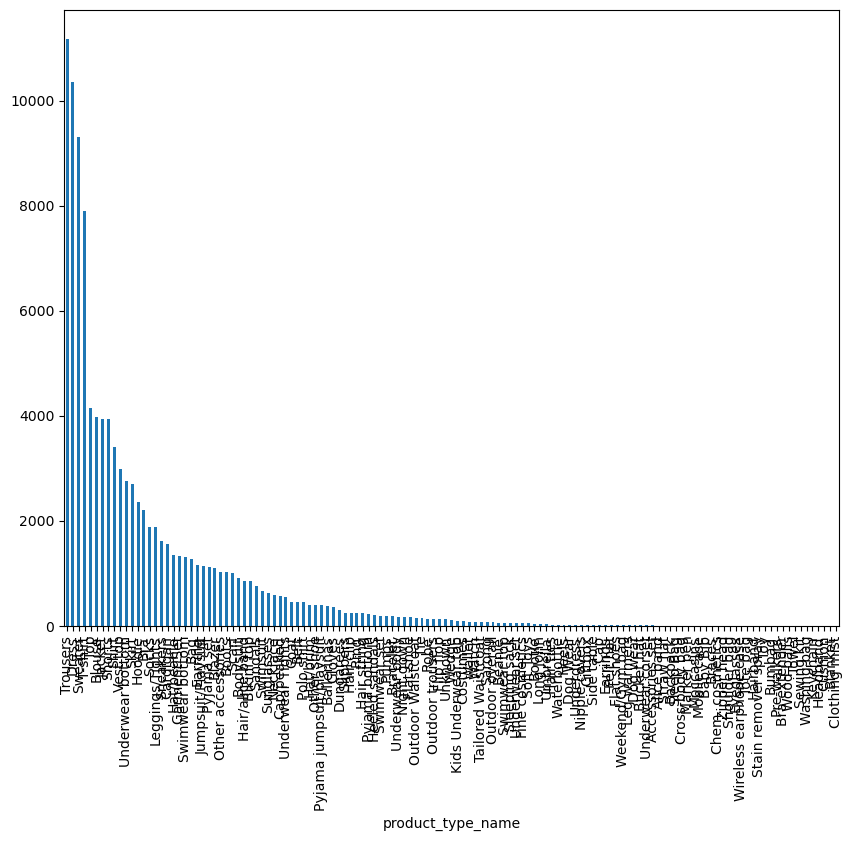

In [20]:
plt.figure(figsize = (10,8))
articles["product_type_name"].value_counts().plot(kind = "bar")
plt.show()

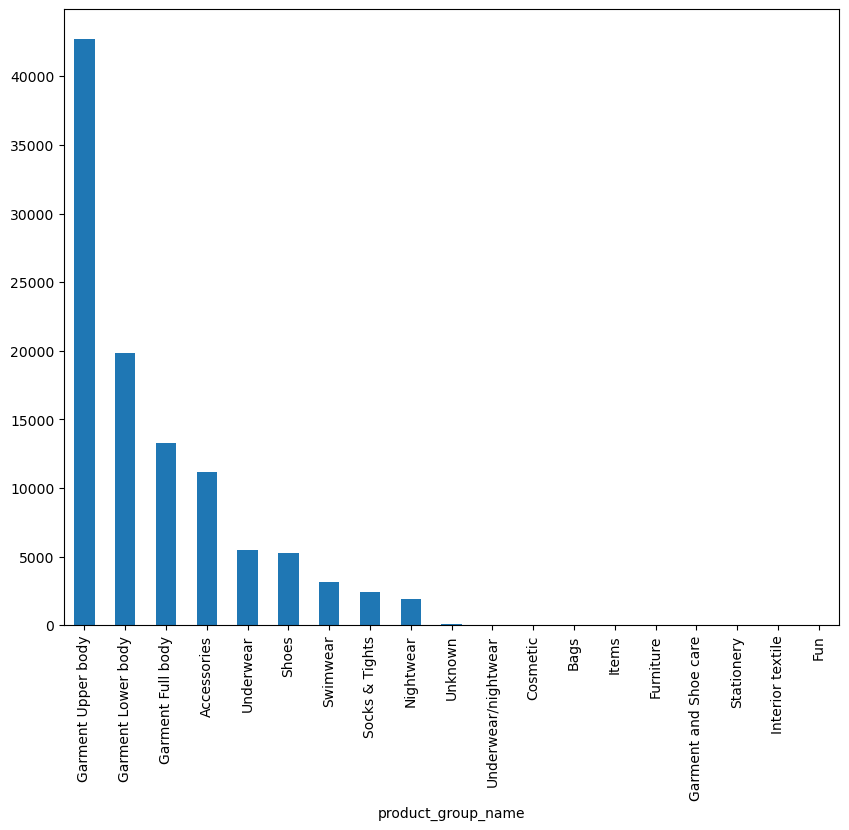

In [21]:
plt.figure(figsize = (10,8))
articles["product_group_name"].value_counts().plot(kind = "bar")
plt.show()

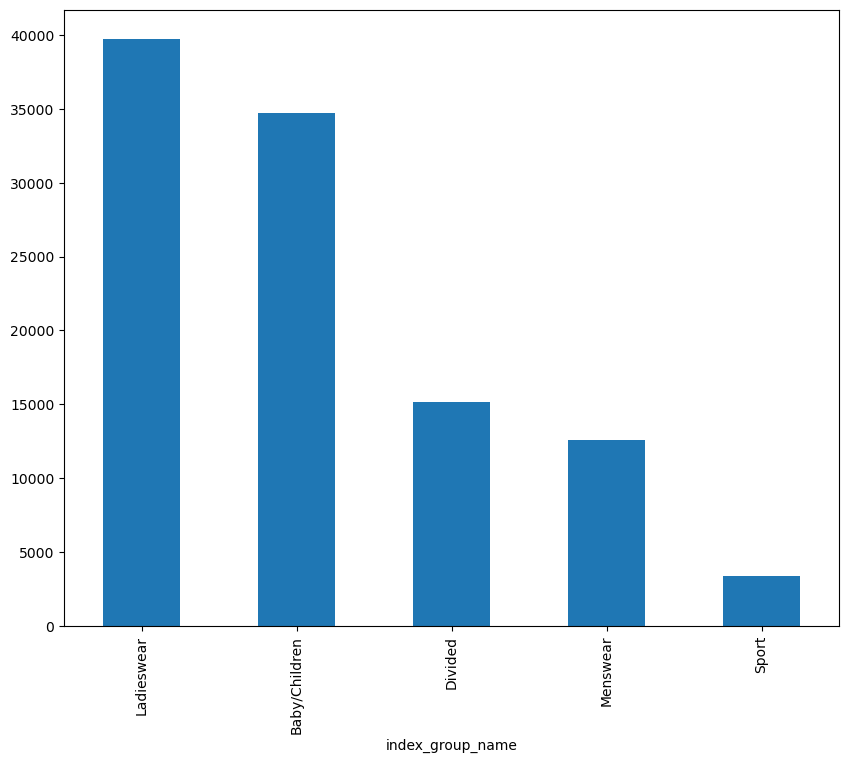

In [22]:
plt.figure(figsize = (10,8))
articles["index_group_name"].value_counts().plot(kind = "bar")
plt.show()

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\1593629189.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


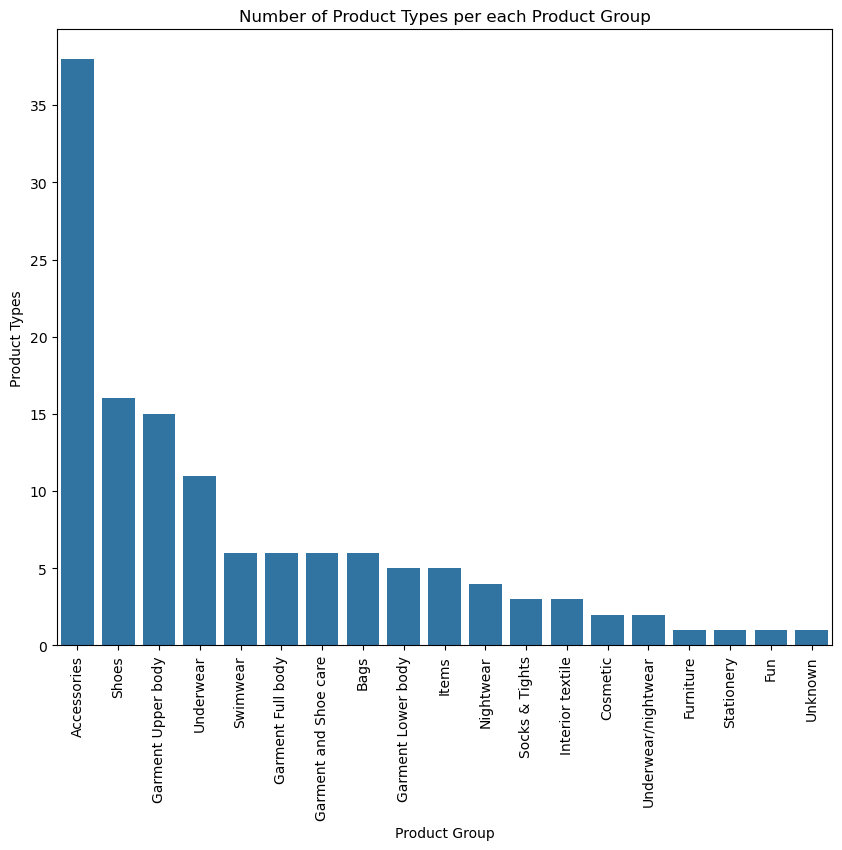

In [25]:

temp = articles.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending = False)
plt.figure(figsize = (10, 8))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("muted")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\3081681374.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


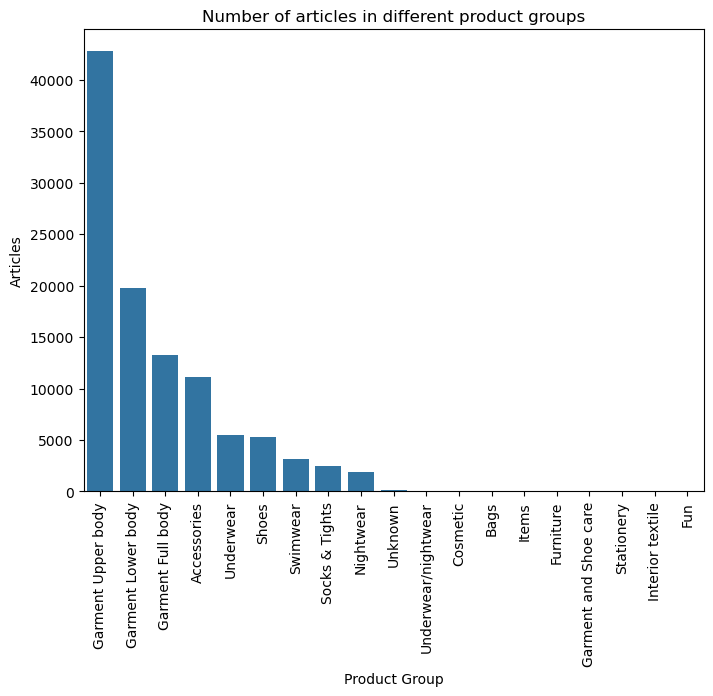

In [26]:
temp = articles.groupby(['product_group_name'])['article_id'].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending = False)
plt.figure(figsize = (8,6))
plt.title('Number of articles in different product groups')
sns.set_color_codes('pastel')
s = sns.barplot(x = 'Product Group', y = 'Articles', data = df)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\1144253133.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


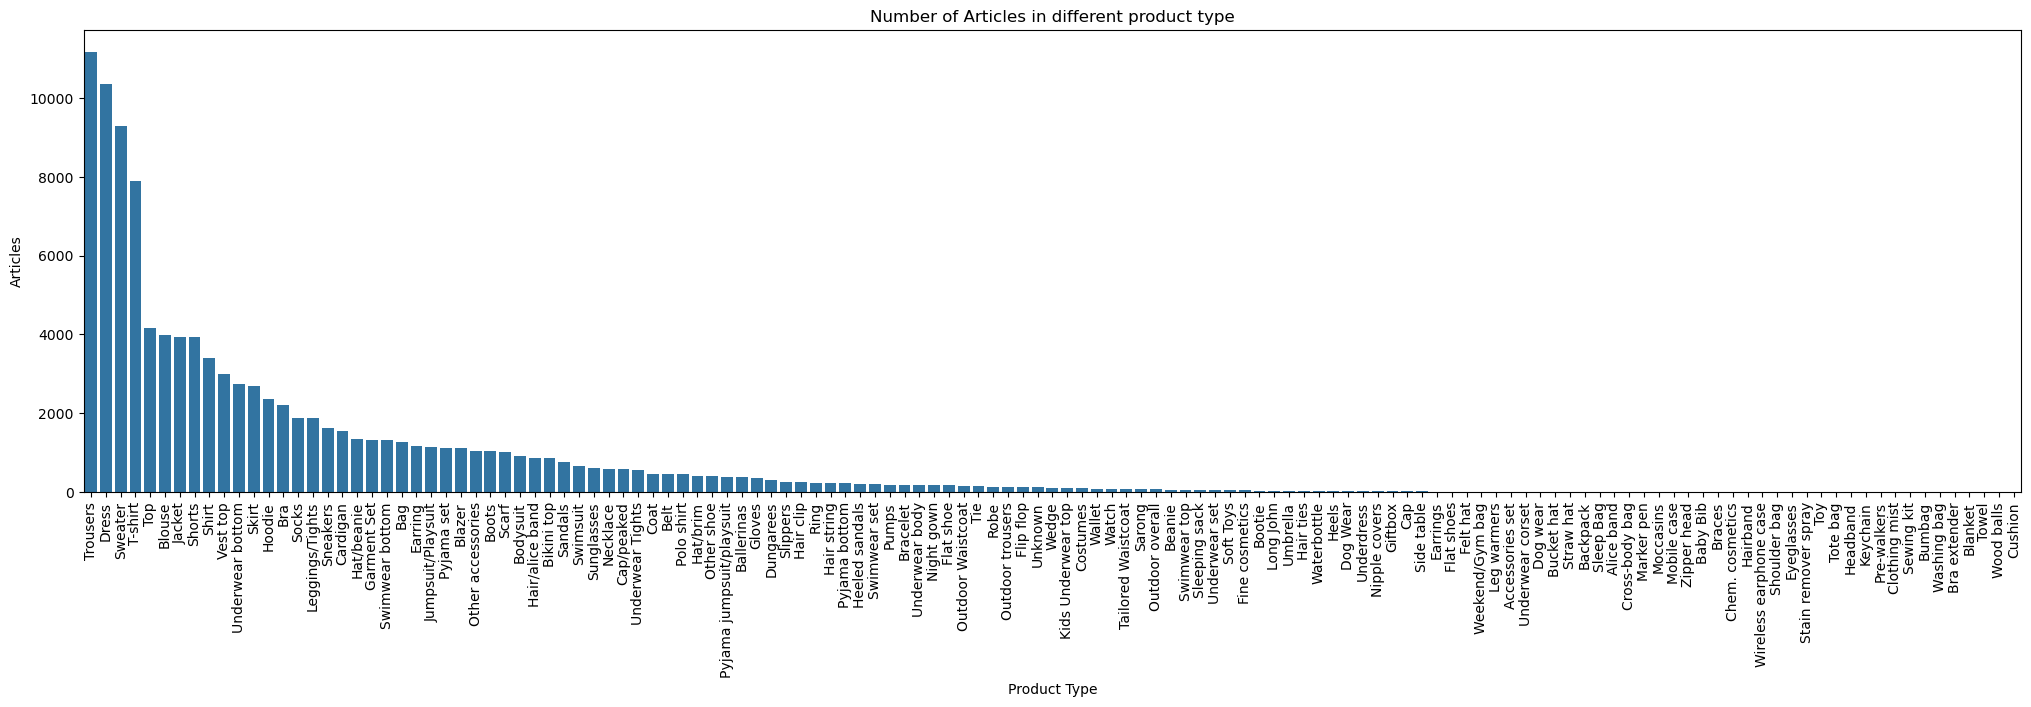

In [27]:
temp = articles.groupby(['product_type_name'])['article_id'].nunique()
df = pd.DataFrame({'Product Type': temp.index, 'Articles': temp.values})
df = df.sort_values(['Articles'], ascending = False)
plt.figure(figsize = (25,6))
plt.title("Number of Articles in different product type")
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y = 'Articles', data = df)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\3951991607.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


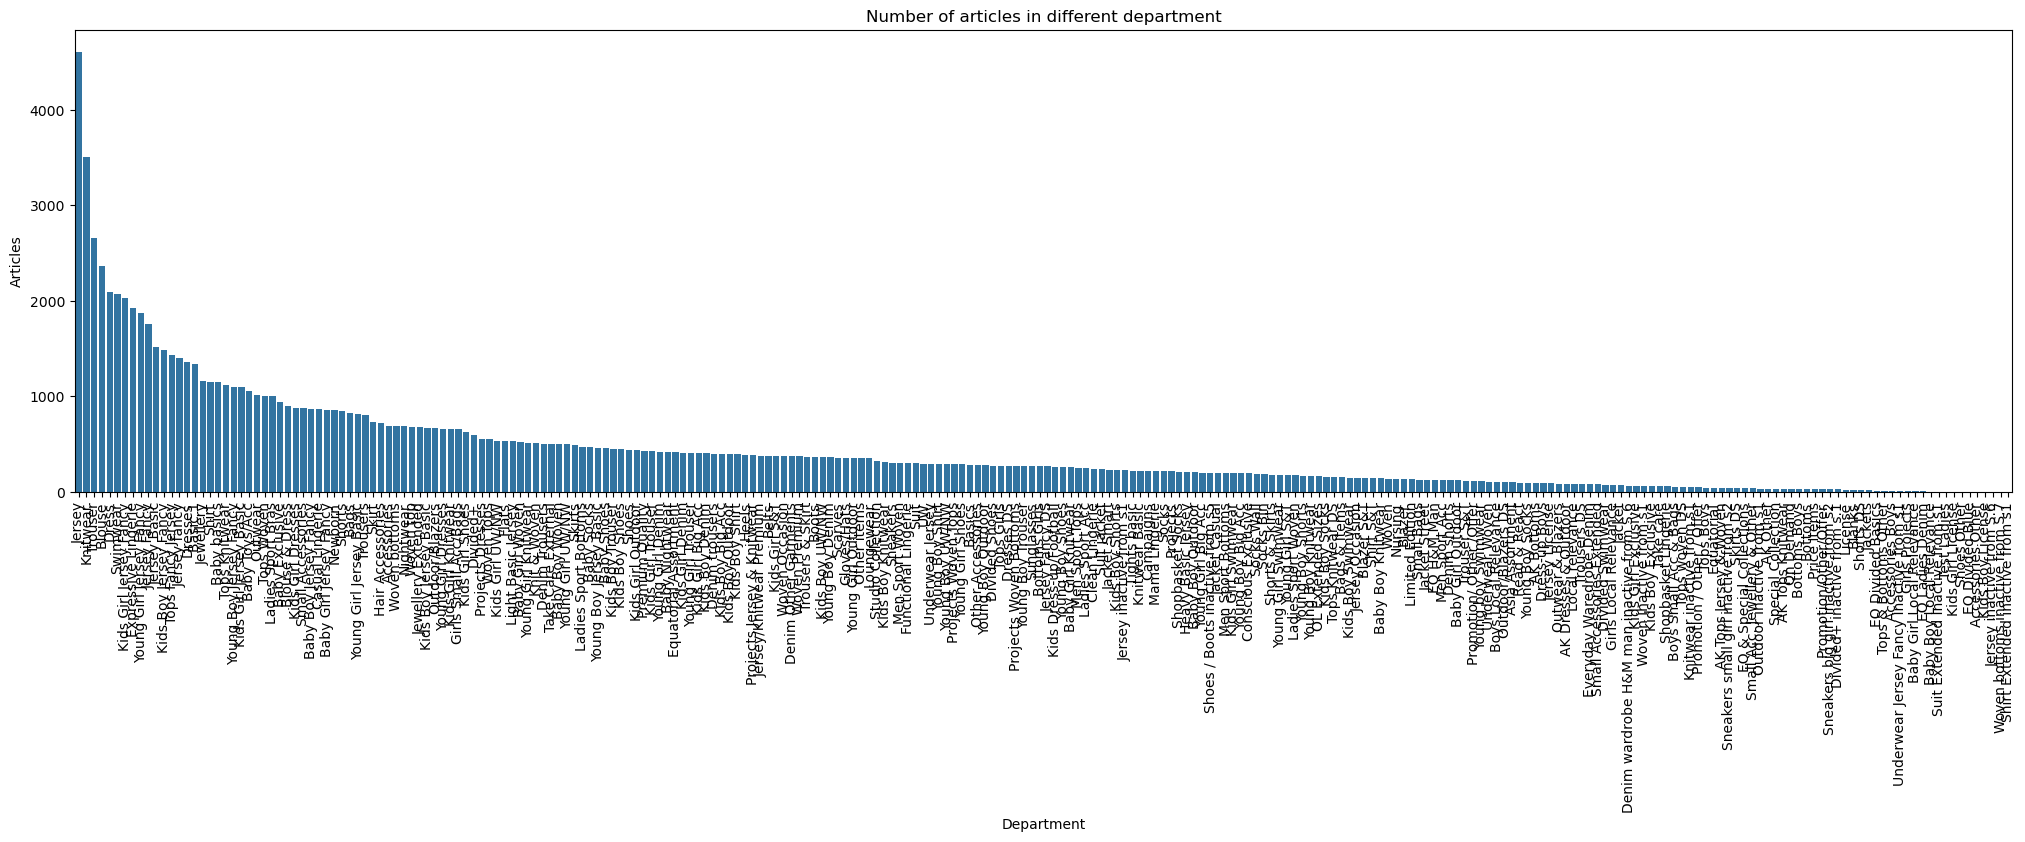

In [28]:
temp = articles.groupby(['department_name'])['article_id'].nunique()
df = pd.DataFrame({"Department": temp.index, "Articles": temp.values})
df = df.sort_values(['Articles'], ascending = False)
plt.figure(figsize = (25,6))
plt.title("Number of articles in different department")
sns.set_color_codes("pastel")
s = sns.barplot(x = "Department", y = "Articles", data =df)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

In [29]:
articles["department_name"].value_counts()

department_name
Jersey                             4604
Knitwear                           3503
Trouser                            2655
Blouse                             2362
Dress                              2087
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License                      1
Name: count, Length: 250, dtype: int64

In [31]:
len(articles["department_name"].unique())

250

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\3644439405.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


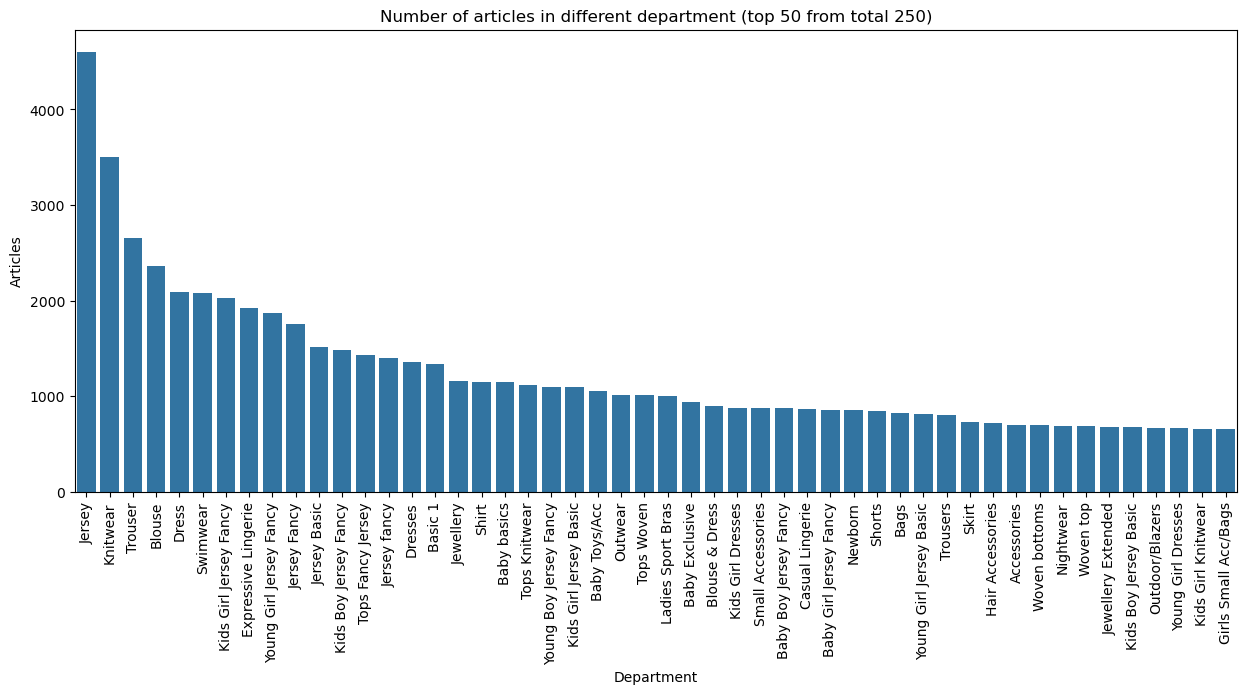

In [32]:
temp = articles.groupby(['department_name'])['article_id'].nunique()
df = pd.DataFrame({"Department": temp.index, "Articles": temp.values})
df = df.sort_values(['Articles'], ascending = False).head(50)
plt.figure(figsize = (15,6))
plt.title("Number of articles in different department (top 50 from total 250)")
sns.set_color_codes("pastel")
s = sns.barplot(x = "Department", y = "Articles", data =df)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

In [33]:
articles.groupby(["department_name"])["product_type_name"].nunique().sort_values(ascending = False)

department_name
Studio Collection                  39
Take Care External                 38
Baby Exclusive                     36
Conscious Exclusive                33
Jersey                             30
                                   ..
Woven bottoms inactive from S.7     1
Kids Boy Trouser                    1
Jersey inactive from S.6            1
Kids Boy License                    1
Underwear Woven                     1
Name: product_type_name, Length: 250, dtype: int64

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\1643472665.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


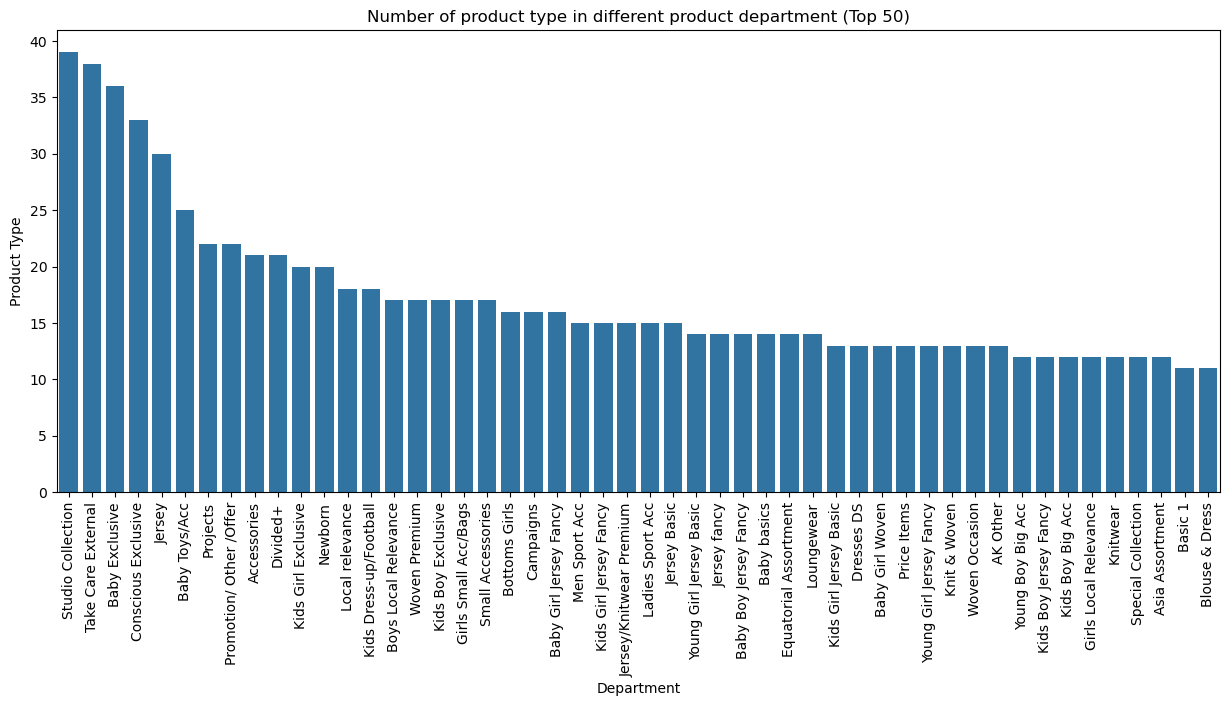

In [34]:
temp = articles.groupby(["department_name"])["product_type_name"].nunique()
df = pd.DataFrame({"Department": temp.index, "Product Type": temp.values})
df = df.sort_values(["Product Type"], ascending = False).head(50)
plt.figure(figsize = (15,6))
plt.title("Number of product type in different product department (Top 50)")
sns.set_color_codes("pastel")
s = sns.barplot(x = "Department", y = "Product Type", data = df)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\507805969.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


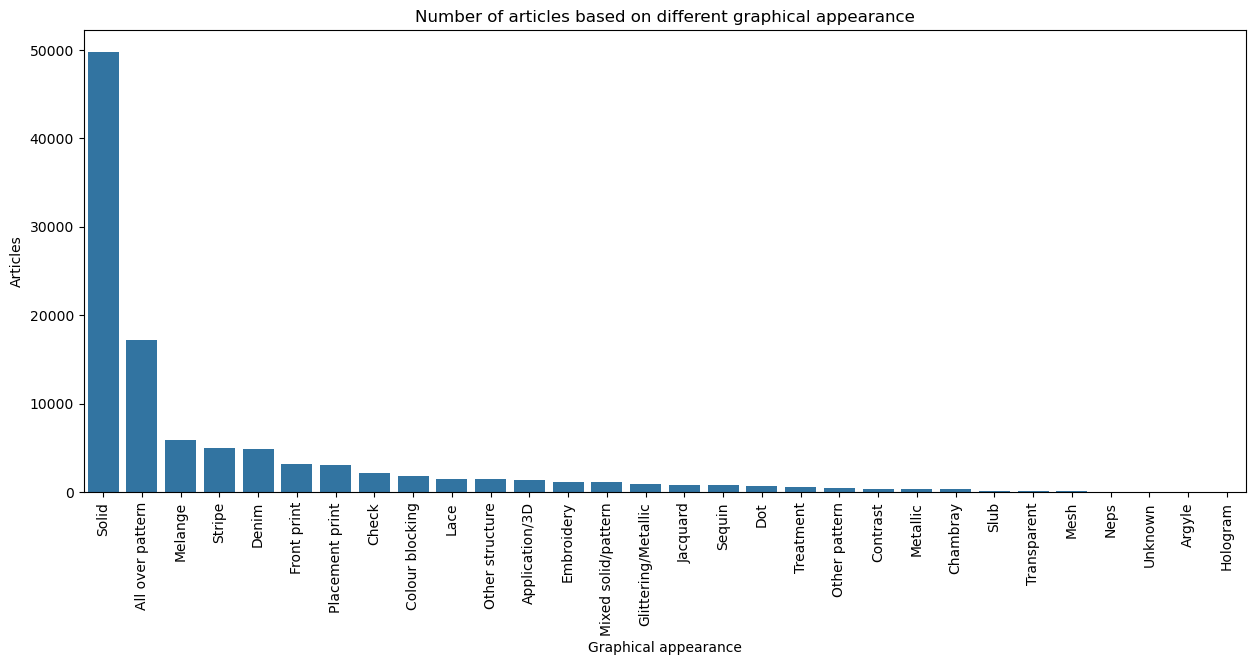

In [35]:
temp = articles.groupby(["graphical_appearance_name"])["article_id"].nunique()
df = pd.DataFrame({"Graphical appearance": temp.index, "Articles": temp.values})
df = df.sort_values(["Articles"], ascending = False)
plt.figure(figsize = (15,6))
plt.title("Number of articles based on different graphical appearance")
sns.set_color_codes("pastel")
s = sns.barplot(x = "Graphical appearance", y = "Articles", data = df)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

In [36]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [37]:
articles.groupby(["index_group_name"])["article_id"].nunique().sort_values(ascending = False)

index_group_name
Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: article_id, dtype: int64

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\2572865200.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


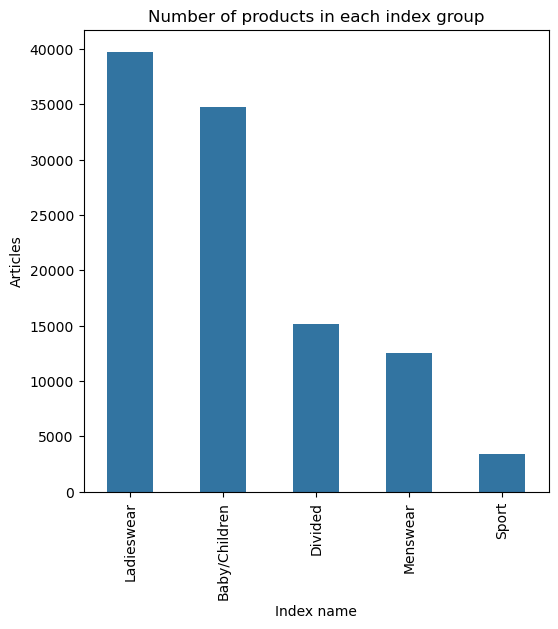

In [38]:
temp = articles.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({"Index name": temp.index, "Articles": temp.values})
df = df.sort_values(["Articles"], ascending = False)
plt.figure(figsize=(6,6))
plt.title("Number of products in each index group")
sns.set_color_codes("pastel")
s = sns.barplot(x = "Index name", y = "Articles", width = 0.5, data = df)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

In [39]:
articles.groupby(["garment_group_name"])["article_id"].nunique().sort_values(ascending = False)

garment_group_name
Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: article_id, dtype: int64

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\1495592488.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


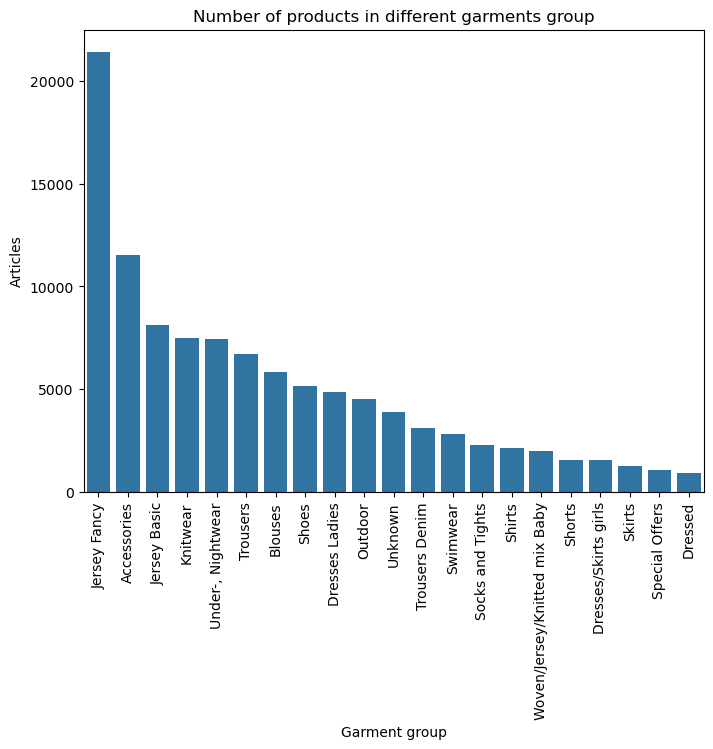

In [40]:
temp = articles.groupby(["garment_group_name"])["article_id"].nunique()
df = pd.DataFrame({"Garment group": temp.index, "Articles": temp.values})
df = df.sort_values(["Articles"], ascending = False)
plt.figure(figsize = (8,6))
plt.title("Number of products in different garments group")
sns.set_color_codes("pastel")
s = sns.barplot(x = "Garment group", y = "Articles", data = df)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

### customers

In [42]:
customers.head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [44]:
customers.groupby(["club_member_status"]).nunique()

,customer_id,FN,Active,fashion_news_frequency,age,postal_code
club_member_status,,,,,,
ACTIVE,1272491,1,1,3,84,344195
LEFT CLUB,467,1,1,2,56,449
PRE-CREATE,92960,1,1,3,82,77322


In [45]:
customers.groupby(["club_member_status"])["customer_id"].nunique()

club_member_status
ACTIVE        1272491
LEFT CLUB         467
PRE-CREATE      92960
Name: customer_id, dtype: int64

In [46]:
customers.fashion_news_frequency

0               NONE
1               NONE
2               NONE
3               NONE
4          Regularly
             ...    
1371975         NONE
1371976         NONE
1371977    Regularly
1371978    Regularly
1371979         NONE
Name: fashion_news_frequency, Length: 1371980, dtype: object

In [47]:
customers.groupby(["fashion_news_frequency"]).nunique()

,customer_id,FN,Active,club_member_status,age,postal_code
fashion_news_frequency,,,,,,
Monthly,842,1,1,2,54,827
NONE,877711,1,1,3,84,306857
Regularly,477416,1,1,3,82,230891


In [48]:
customers['fashion_news_frequency'].replace({"None": "NONE"}, inplace = True)

In [49]:
customers.groupby(["fashion_news_frequency"]).nunique()

,customer_id,FN,Active,club_member_status,age,postal_code
fashion_news_frequency,,,,,,
Monthly,842,1,1,2,54,827
NONE,877711,1,1,3,84,306857
Regularly,477416,1,1,3,82,230891


C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\361958451.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels())


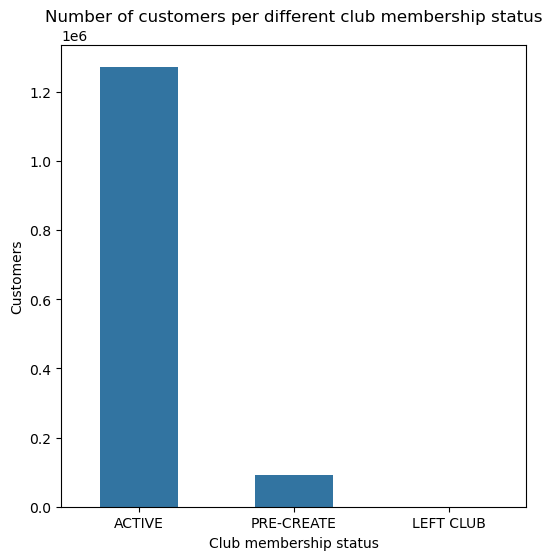

In [50]:
temp = customers.groupby(["club_member_status"])["customer_id"].nunique()
df = pd.DataFrame({"Club membership status": temp.index, "Customers": temp.values})
df = df.sort_values(["Customers"], ascending = False)
plt.figure(figsize = (6,6))
plt.title("Number of customers per different club membership status")
sns.set_color_codes("pastel")
s = sns.barplot(x = "Club membership status", y = "Customers", width = 0.5, data = df)
s.set_xticklabels(s.get_xticklabels())
locs, labels = plt.xticks()
plt.show()

In [51]:
customers.groupby(["club_member_status"])["age"].nunique()

club_member_status
ACTIVE        84
LEFT CLUB     56
PRE-CREATE    82
Name: age, dtype: int64

In [52]:
customers.club_member_status.nunique()

3

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\3689493613.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels())


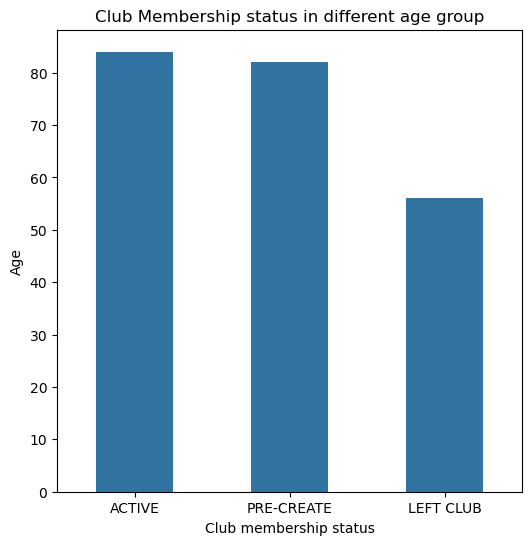

In [53]:
temp = customers.groupby(["club_member_status"])["age"].nunique()
df = pd.DataFrame({"Club membership status": temp.index, "Age": temp.values})
df = df.sort_values(["Age"], ascending = False)
plt.figure(figsize = (6,6))
plt.title("Club Membership status in different age group")
sns.set_color_codes("pastel")
s = sns.barplot(x = "Club membership status", y = "Age", width = 0.5, data = df)
s.set_xticklabels(s.get_xticklabels())
locs, labels = plt.xticks()
plt.show()

### transactions

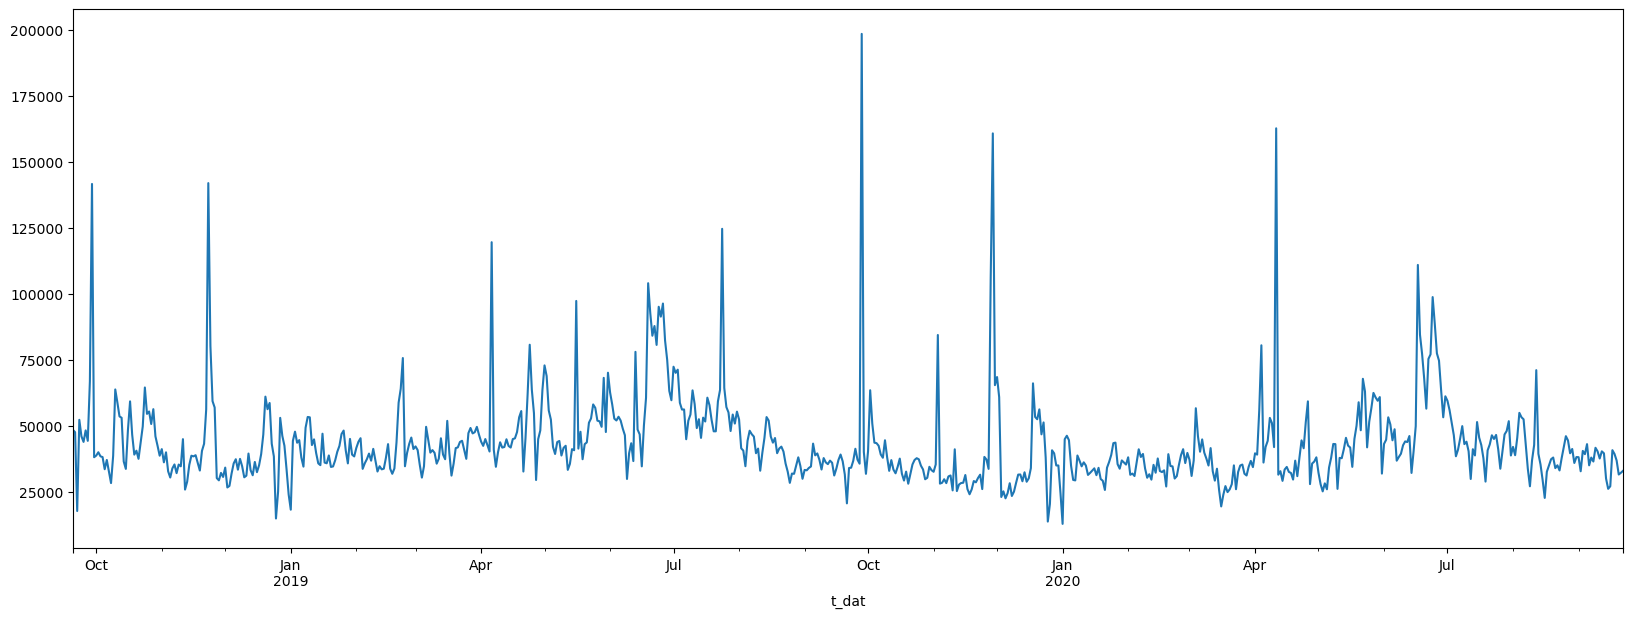

In [54]:
pd.to_datetime(transactions['t_dat']).value_counts().sort_index().plot(kind='line', figsize=(20, 7))
plt.show()

# Content-based

## process

In [60]:
ohe_columns = ['product_group_name', 'graphical_appearance_no','perceived_colour_master_id', 'index_code', \
               'garment_group_no']
emb_columns = ['product_type_name', 'department_name', 'colour_group_name', 'section_name', 'detail_desc']

### articles

In [62]:
articles[['article_id']+emb_columns]

,article_id,product_type_name,department_name,colour_group_name,section_name,detail_desc
0,108775015,Vest top,Jersey Basic,Black,Womens Everyday Basics,Jersey top with narrow shoulder straps.
1,108775044,Vest top,Jersey Basic,White,Womens Everyday Basics,Jersey top with narrow shoulder straps.
2,108775051,Vest top,Jersey Basic,Off White,Womens Everyday Basics,Jersey top with narrow shoulder straps.
3,110065001,Bra,Clean Lingerie,Black,Womens Lingerie,"Microfibre T-shirt bra with underwired, moulde..."
4,110065002,Bra,Clean Lingerie,White,Womens Lingerie,"Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...
105537,953450001,Socks,Socks Bin,Black,Men Underwear,Socks in a fine-knit cotton blend with a small...
105538,953763001,Vest top,Jersey,Black,H&M+,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,Dress,Jersey,Black,Womens Trend,"Short, A-line dress in jersey with a round nec..."
105540,957375001,Hair clip,Small Accessories,Black,Divided Accessories,Large plastic hair claw.


In [63]:
articles['detail_desc'].unique()[-20:]

array(['Set with six earrings and an ear cuff in metal decorated with glass rhinestones. The zinc content of the set is recycled.',
       'Tights in soft lace with an elasticated waist.',
       'Set with a long-sleeved top and a skirt in soft sweatshirt fabric made from an organic cotton blend. Top with ribbing around the neckline, cuffs and hem. Skater skirt with covered elastication at the waist.',
       'Pyjamas with a long-sleeved top and bottoms in soft velour. Top with ribbing around the neckline, cuffs and hem. Bottoms with covered elastication at the waist and tapered legs with ribbed hems.',
       'Knee-length skirt in soft, organic cotton jersey. High waist with elastication at the top for best fit over the tummy.',
       'Lined, waterproof wellingtons with a relief-pattern on the shaft, a trim at the top in woven fabric with a drawstring, and chunky soles. Transparent section at the back of the soles with motion-activated flashing LED lights in various colours.',
      

In [65]:
import re
from nltk.stem import WordNetLemmatizer
import nltk
stopwords = set(nltk.corpus.stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [66]:
def preprocess(x):
    x = ' '+x+' '
    x = x.lower()
    
    # remove digits
    x = re.sub(r'\d+\-\d+', ' ', x)
    x = re.sub(r'\d+\.\d+', ' ', x)
    x = re.sub(r'\d+/\d+', ' ', x)
    x = re.sub(r'\d+', ' ', x)
    # remove everything in braces
    x = re.sub(r'\(.+?\)', ' ', x)
    
    x = re.sub(r' cm ', ' ', x)
    x = re.sub(r' denier ', ' ', x)
    x = re.sub(r' t\-shirt ', ' tshirt ', x)
    x = re.sub(r'(\w+)(\+)', r'\1 plus', x)
    # remove everything except letters
    x = re.sub(r'[^a-z\s]', ' ', x)
    tokens = x.strip().split()
    tokens = ' '.join([lemmatizer.lemmatize(token) for token in tokens if token not in stopwords])
    return tokens

s = '5-pocket slim-fit t-shirt h&m+'
preprocess(s)

'pocket slim fit tshirt h plus'

In [67]:
from tqdm import tqdm
tqdm.pandas()
articles['desc_full'] = articles['product_type_name']+' '+articles['department_name']+' '\
                        +articles['colour_group_name']+' '+articles['section_name']+' '\
                        +articles['detail_desc'].fillna(' ')
articles['desc_full_prep'] = articles['desc_full'].progress_apply(preprocess)

100%|████████████████████████████████████████████████████████████████████████| 105542/105542 [00:15<00:00, 6966.29it/s]


In [68]:
texts = articles['desc_full_prep'].unique().tolist()
with open('texts_normalized.txt', 'w') as f:
    for text in texts:
        f.write(text)
        f.write('\n')

In [70]:
!pip install fasttext

     ---------------------------------------- 0.0/68.8 kB ? eta -:--:--
     ---------------------------------------- 68.8/68.8 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for pybind11>=2.2 from https://files.pythonhosted.org/packages/06/55/9f73c32dda93fa4f539fafa268f9504e83c489f460c380371d94296126cd/pybind11-2.11.1-py3-none-any.whl.metadata
  Using cached pybind11-2.11.1-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-win_amd64.whl size=232093 sha256=c5858c771135b74e03782f83775a72a4c09113f208361e50f88772ab6a7bfdae
  Stored in directory: c:\users\김하나\appdata\local\pip\cache\wheels\64\57\bc\1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext


In [71]:
import fasttext
fasttext_model = fasttext.train_unsupervised('texts_normalized.txt', minn=2, maxn=5, dim=200)

In [72]:
doc2vec_dict = {}
for row in articles[['article_id', 'desc_full_prep']].itertuples():
    doc2vec_dict[row[1]] = fasttext_model.get_sentence_vector(row[2])

In [73]:
emb_features = np.array(list(doc2vec_dict.values()))
emb_features.shape

(105542, 200)

In [74]:
articles[['article_id']+ohe_columns]

,article_id,product_group_name,graphical_appearance_no,perceived_colour_master_id,index_code,garment_group_no
0,108775015,Garment Upper body,1010016,5,A,1002
1,108775044,Garment Upper body,1010016,9,A,1002
2,108775051,Garment Upper body,1010017,9,A,1002
3,110065001,Underwear,1010016,5,B,1017
4,110065002,Underwear,1010016,9,B,1017
...,...,...,...,...,...,...
105537,953450001,Socks & Tights,1010014,5,F,1021
105538,953763001,Garment Upper body,1010016,5,A,1005
105539,956217002,Garment Full body,1010016,5,A,1005
105540,957375001,Accessories,1010016,5,D,1019


In [75]:
ohe_features = pd.get_dummies(articles[ohe_columns].astype(str)).astype(int).values
ohe_features.shape

(105542, 100)

In [76]:
articles_features = np.concatenate([emb_features, ohe_features], axis=1)
articles_features.shape

(105542, 300)

In [77]:
articles_features_with_id = {}
for article_id, features in zip(articles['article_id'].values, articles_features):
    articles_features_with_id[article_id] = features

### customers

In [78]:
customers[['FN', 'Active']] = customers[['FN', 'Active']].fillna(0).astype(int)
customers[['club_member_status', 'fashion_news_frequency']] = customers[['club_member_status', \
                                                                         'fashion_news_frequency']].fillna('NONE')

In [79]:
customers['age'] = customers['age'].fillna(customers['age'].mean())

bins = [16, 20, 25, 30, 40, 50, 60, 100]
labels = [1,2,3,4,5,6,7]
customers['age_bins'] = pd.cut(customers['age'], bins=bins, labels=labels)
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_bins
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,5
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,2
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,2
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,6
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,6
...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0,0,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,2
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0,0,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,2
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1,1,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,2
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1,1,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,1


In [80]:
ohe_columns = ['club_member_status', 'fashion_news_frequency', 'age_bins']
ohe_features = pd.get_dummies(customers[ohe_columns].astype(str)).astype(int)
customer_features = pd.concat([customers[['FN', 'Active']], ohe_features], axis=1).values
customer_features.shape

(1371980, 17)

In [81]:
customer_features_with_id = {}
for customer_id, features in zip(customers['customer_id'].values, customer_features):
    customer_features_with_id[customer_id] = features

## Train test split

In [55]:
from datetime import datetime, timedelta
max_date = transactions['t_dat'].max()

# keep one last 1 day for test dataset
end_train_date = datetime.strptime(max_date, '%Y-%M-%d') - timedelta(days=1)
end_train_date = end_train_date.strftime('%Y-%M-%d')
end_train_date

'2020-09-21'

In [56]:
transactions_train = transactions[transactions['t_dat']<=end_train_date]
transactions_test = transactions[transactions['t_dat']>end_train_date]
transactions_train.shape, transactions_test.shape

((31755458, 5), (32866, 5))

In [82]:
articles_ids = pd.Series(list(articles_features_with_id.keys()))
def create_zero_target(transactions_df_grouped):
    cutomers_lst = []
    articles_lst = []
    for row in transactions_df_grouped[['customer_id', 'article_id']].itertuples():
        customer_id, article_ids = row[1], row[2]
        unord_article_id = articles_ids[~articles_ids.isin(article_ids)].sample(50)
        cutomers_lst.append(customer_id)
        articles_lst.append(unord_article_id)
    df = pd.DataFrame({'customer_id':cutomers_lst, 'article_id':articles_lst, 'target':[0]*len(cutomers_lst)}).\
                                                                                            explode('article_id')
    return df

## create test dataset

In [83]:
transactions_test['target'] = 1

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\1659739533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_test['target'] = 1


In [84]:
transactions_test_grouped = transactions_test.drop(['article_id'], axis=1).\
                                                    merge(transactions[['customer_id', 'article_id']], \
                                                    how='left', on='customer_id').\
                                                    groupby('customer_id')['article_id'].apply(lambda x: \
                                                                                        list(set(x))).reset_index()
zero_test_target = create_zero_target(transactions_test_grouped)
test = pd.concat([transactions_test, zero_test_target])[['customer_id', 'article_id', 'target']].\
                                                                    sort_values(by='customer_id').reset_index(drop=True)
test

,customer_id,article_id,target
0,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,827487003,1
1,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,713445001,0
2,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,696410001,0
3,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,508929048,0
4,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,651206001,0
...,...,...,...
559261,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,774160001,0
559262,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,659301001,0
559263,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,266873006,0
559264,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,903516002,0


In [85]:
test_customer_features = np.array([customer_features_with_id[customer_id] for customer_id in \
                                   test['customer_id'].values])
test_article_features = np.array([articles_features_with_id[article_id] for article_id in \
                                  test['article_id'].values])
test_target = test['target'].values
test_customer_features.shape, test_article_features.shape, test_target.shape

((559266, 17), (559266, 300), (559266,))

## create train dataset

In [86]:
transactions_train_grouped = transactions_train.groupby('customer_id')['article_id'].apply(lambda x: len(set(x)))
selected_customers = transactions_train_grouped[transactions_train_grouped>10].sample(20000, random_state=1).index.values
transactions_train = transactions_train[transactions_train['customer_id'].isin(selected_customers)]
transactions_train.shape

(932082, 5)

In [87]:
transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])
dt_train_max = transactions_train['t_dat'].max()
rating_dict = {x: 0.5**((dt_train_max - x).days/360) for x in transactions_train['t_dat'].unique()}
transactions_train['target'] = transactions_train['t_dat'].map(rating_dict)
transactions_train

,t_dat,customer_id,article_id,price,sales_channel_id,target
89,2018-09-20,00708c3da4d07706d4cad77c6aecc1b1ce33d21d73022c...,255396006,0.067780,2,0.24429
90,2018-09-20,00708c3da4d07706d4cad77c6aecc1b1ce33d21d73022c...,594834010,0.042356,2,0.24429
91,2018-09-20,00708c3da4d07706d4cad77c6aecc1b1ce33d21d73022c...,516712001,0.022017,2,0.24429
93,2018-09-20,00761aefe07a2dd6ca110c99f3856ede55f20ff00ce754...,634015003,0.012186,1,0.24429
94,2018-09-20,00761aefe07a2dd6ca110c99f3856ede55f20ff00ce754...,636351002,0.007610,1,0.24429
...,...,...,...,...,...,...
31755087,2020-09-21,fd5873bd76605e3197d653b338c7fc147c93f195366059...,915529005,0.033881,2,1.00000
31755088,2020-09-21,fd63229e7189ef8731f1584d3a29fd36af4c5853a3ab2b...,936282001,0.025407,2,1.00000
31755313,2020-09-21,ff05ae6e56395fe81a69192c23f054ffda5e69c1ec28b5...,837249002,0.013542,1,1.00000
31755314,2020-09-21,ff05ae6e56395fe81a69192c23f054ffda5e69c1ec28b5...,719957017,0.022017,1,1.00000


In [88]:
transactions_train_grouped = transactions_train.drop(['article_id'], axis=1).\
                                                    merge(transactions[['customer_id', 'article_id']], \
                                                    how='left', on='customer_id').\
                                                    groupby('customer_id')['article_id'].\
                                                    apply(lambda x: list(set(x))).reset_index()

zero_train_target = create_zero_target(transactions_train_grouped)
train = pd.concat([transactions_train, zero_train_target])[['customer_id', 'article_id', 'target']].\
                                                                    sort_values(by='customer_id').reset_index(drop=True)
train

,customer_id,article_id,target
0,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,669786001,0.485766
1,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,772762002,0.000000
2,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,876221002,0.000000
3,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,706068003,0.000000
4,00015c1a121e08bbd2552c15fbbb6e6b19d3bf8f7b6a3d...,362997012,0.000000
...,...,...,...
1932077,fffd70b14382482cf3d10def86df367b2b6e0af711dede...,850587004,0.901250
1932078,fffd70b14382482cf3d10def86df367b2b6e0af711dede...,762188002,0.901250
1932079,fffd70b14382482cf3d10def86df367b2b6e0af711dede...,797088008,0.564482
1932080,fffd70b14382482cf3d10def86df367b2b6e0af711dede...,769270001,0.648420


In [89]:
train_customer_features = np.array([customer_features_with_id[customer_id] for customer_id in \
                                    train['customer_id'].values])
train_article_features = np.array([articles_features_with_id[article_id] for article_id in \
                                   train['article_id'].values])
train_target = train['target'].values
train_customer_features.shape, train_article_features.shape, train_target.shape

((1932082, 17), (1932082, 300), (1932082,))

In [90]:
del transactions_train
del transactions_train_grouped
del transactions_test
del transactions_test_grouped
import gc
gc.collect()

29

## train model

In [91]:
import tensorflow as tf
from tensorflow import keras

num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(num_outputs) 
])

item_NN = tf.keras.models.Sequential([   
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs)
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(train_customer_features.shape[1]))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(train_article_features.shape[1]))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32)           4252        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 32)           114080      ['input_2[0][0]']                
                                                                                              

In [92]:
class SaveBestModel(tf.keras.callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False):
        self.save_best_metric = save_best_metric
        self.max = this_max
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        metric_value = logs[self.save_best_metric]
        if self.max:
            if metric_value > self.best:
                self.best = metric_value
                self.best_weights = self.model.get_weights()

        else:
            if metric_value < self.best:
                self.best = metric_value
                self.best_weights= self.model.get_weights()
                
save_best_model = SaveBestModel()

In [93]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [94]:
tf.random.set_seed(1)
model.fit([train_customer_features, train_article_features], train_target, epochs=20, \
          validation_data=([test_customer_features, test_article_features], test_target), \
          callbacks=[save_best_model])
#set best weigts
model.set_weights(save_best_model.best_weights)

Epoch 1/20
60378/60378 [==============================] - 418s 7ms/step - loss: 0.0679 - val_loss: 0.0679
Epoch 2/20
60378/60378 [==============================] - 404s 7ms/step - loss: 0.0643 - val_loss: 0.0678
Epoch 3/20
60378/60378 [==============================] - 414s 7ms/step - loss: 0.0627 - val_loss: 0.0697
Epoch 4/20
60378/60378 [==============================] - 408s 7ms/step - loss: 0.0617 - val_loss: 0.0740
Epoch 5/20
60378/60378 [==============================] - 410s 7ms/step - loss: 0.0609 - val_loss: 0.0675
Epoch 6/20
60378/60378 [==============================] - 409s 7ms/step - loss: 0.0603 - val_loss: 0.0648
Epoch 7/20
60378/60378 [==============================] - 413s 7ms/step - loss: 0.0598 - val_loss: 0.0663
Epoch 8/20
60378/60378 [==============================] - 421s 7ms/step - loss: 0.0593 - val_loss: 0.0684
Epoch 9/20
60378/60378 [==============================] - 416s 7ms/step - loss: 0.0589 - val_loss: 0.0683
Epoch 10/20
60378/60378 [=====================

In [95]:
del train_customer_features
del train_article_features
del train_target
import gc
gc.collect()

3245

## predict on test set

In [96]:
test_customer_features

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [97]:
predicted_score = model.predict([test_customer_features, test_article_features])

17478/17478 [==============================] - 29s 2ms/step


In [98]:
test['predicted_score'] = predicted_score.reshape(-1)
test_grouped = test.groupby('customer_id').agg({'article_id':list, 'target':list, 'predicted_score':list})
test_grouped = test_grouped[test_grouped['target'].apply(lambda x: len(set(x))>1)]
test_grouped['predicted_article_id'] = test_grouped[['article_id', 'predicted_score']].\
                                    apply(lambda x: list(np.array(x[0])[np.argsort(x[1])[::-1]]), axis=1)
test_grouped = test_grouped.reset_index()
test_grouped

C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\1367768386.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  apply(lambda x: list(np.array(x[0])[np.argsort(x[1])[::-1]]), axis=1)


,customer_id,article_id,target,predicted_score,predicted_article_id
0,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,"[827487003, 713445001, 696410001, 508929048, 6...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.45734110474586487, 0.066250741481781, 0.368...","[863587001, 808552011, 827487003, 827687001, 7..."
1,000525e3fe01600d717da8423643a8303390a055c578ed...,"[880777002, 790383003, 882139001, 384851004, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.1433829516172409, 0.40364426374435425, 0.56...","[882139001, 700758001, 854021002, 875580001, 7..."
2,0010e8eb18f131e724d6997909af0808adbba057529edb...,"[657246001, 791657004, 800815001, 843817001, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.2023802399635315, 0.058659300208091736, 0.0...","[372860001, 610776002, 564326001, 854885001, 7..."
3,001436e2c83cda28548dd668cfc7d621d70d2baf6f6cf0...,"[820944001, 798579002, 735742001, 691730001, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.013371776789426804, 0.3262083828449249, 0.1...","[594987022, 798579002, 936282001, 822355002, 7..."
4,0026ebdd70715d8fa2befa14dfed317a1ffe5451aba839...,"[596709002, 717071001, 653082002, 639838019, 7...","[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0.08601626753807068, 0.2595634460449219, 0.18...","[850917001, 760084003, 854679003, 785018003, 7..."
...,...,...,...,...,...
10523,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,"[757812001, 718467001, 732671003, 808619004, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.1567581444978714, 0.04893798753619194, 0.43...","[896169005, 869331006, 758034001, 856440002, 8..."
10524,fff2282977442e327b45d8c89afde25617d00124d0f999...,"[487750038, 714637004, 879745001, 900258001, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.046498142182826996, 0.13582707941532135, 0....","[891322004, 816336005, 851065001, 547393002, 9..."
10525,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,"[713993078, 536139069, 739672008, 561548009, 8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.11459297686815262, 0.36903515458106995, 0.0...","[832481005, 802023005, 786925005, 536139069, 8..."
10526,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,"[792753002, 803438001, 579010016, 782726001, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.17604513466358185, 0.04222606495022774, 0.0...","[717490060, 852374003, 678342015, 892309003, 7..."


## predict on sample_submisson

In [133]:
sample_submission = pd.read_csv("sample_submission.csv")

In [118]:
sample_submission # 너무 길다 일부만 하자

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0706016001 0706016002 0372860001 0610776002 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016001 0706016002 0372860001 0610776002 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016001 0706016002 0372860001 0610776002 07...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0706016001 0706016002 0372860001 0610776002 07...


In [122]:
sample_article = list(articles_features_with_id.keys())
len_sample_article = len(sample_article)

# split sample submission to not run out of the memory
df_subsets = []
for df in np.array_split(sample_submission, 100000):

    df_subset = []
    for customer_id in tqdm(df['customer_id'], total=len(df)):
        df_subset.append(pd.DataFrame({'customer_id':[customer_id]*len_sample_article, 'article_id':sample_article}))
    df_subset = pd.concat(df_subset, ignore_index=True)
    print('df_subset shape', df_subset.shape)
    subset_customer_features = np.array([customer_features_with_id[customer_id] for customer_id in \
                                        df_subset['customer_id'].values])
    print('subset_customer_features', subset_customer_features.shape)
    subset_article_features = np.array([articles_features_with_id[article_id] for article_id in \
                                       df_subset['article_id'].values])
    print('subset_article_features', subset_article_features.shape)
    predicted_score = model.predict([subset_customer_features, subset_article_features])
    
    df_subset['predicted_score'] = predicted_score.reshape(-1)
    df_subset_grouped = df_subset.groupby('customer_id').agg({'article_id':list,'predicted_score':list})
    df_subset_grouped['prediction'] = df_subset_grouped[['article_id', 'predicted_score']].\
                                        apply(lambda x: list(np.array(x[0])[np.argsort(x[1])[::-1]]), axis=1)
    df_subset_grouped['prediction'] = df_subset_grouped['prediction'].\
                                                    apply(lambda x: ' '.join(str(item) for item in x[:12]))
    df_subset_grouped = df_subset_grouped.reset_index()[['customer_id', 'prediction']]
    df_subsets.append(df_subset_grouped)
    break

C:\Users\Public\miniconda3\envs\hana\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:18<00:00,  1.33s/it]


df_subset shape (1477588, 2)
subset_customer_features (1477588, 17)
subset_article_features (1477588, 300)
46175/46175 [==============================] - 248s 5ms/step


C:\Users\김하나\AppData\Local\Temp\ipykernel_4652\2507741834.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  apply(lambda x: list(np.array(x[0])[np.argsort(x[1])[::-1]]), axis=1)


In [123]:
df_subset_grouped

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,800691007 896152003 909370001 832465002 915526...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,915526002 915526001 924243001 909370001 918835...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,915526002 915526001 924243001 909370001 918835...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,800691007 915526001 896152003 924243001 909370...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,800691007 909370001 915526001 896152003 924243...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,800691007 600886022 739590038 817401001 833530...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,937466002 915526002 879248008 850259001 915526...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,730683050 918292004 817472005 918292011 918836...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,937466002 915526002 879248008 850259001 915526...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,937466002 915526002 879248008 850259001 915526...


# Item-based

In [102]:
trans = transactions.copy()

In [103]:
trans.drop(columns = ['sales_channel_id', 'price'], inplace = True)

In [104]:
trans["bought"] = 1

In [105]:
start_date = pd.to_datetime('2020-08-22')
# Filter trans by date
trans["t_dat"] = pd.to_datetime(trans["t_dat"])
trans = trans.loc[trans["t_dat"] >= start_date]

# Filter trans by number of articles each customer has been bought
customer_bought_count = trans[['customer_id', 't_dat']].groupby('customer_id').count().reset_index().rename(columns={'t_dat': 'count'})
most_bought_customers = customer_bought_count[customer_bought_count['count']>3]['customer_id'].values
trans = trans[trans['customer_id'].isin(most_bought_customers)]

# Filter trans by number of an article has been bought in total.
article_bought_count = trans[['article_id', 't_dat']].groupby('article_id').count().reset_index().rename(columns={'t_dat': 'count'})
most_bought_articles = article_bought_count[article_bought_count['count']>10]['article_id'].values
trans = trans[trans['article_id'].isin(most_bought_articles)]

In [107]:
trans['pop_factor'] = trans['t_dat'].apply(lambda x: 1/(datetime(2020,9,23) - x).days)
trans_by_article = trans[['article_id', 'pop_factor']].groupby('article_id').sum().reset_index()
default_recommendation = trans_by_article.sort_values(by='pop_factor', ascending=False)['article_id'].values[:12]

In [108]:
default_recommendation

array([751471001, 915529003, 448509014, 924243002, 924243001, 714790020,
       918292001, 923758001, 751471043, 762846027, 918522001, 866731001],
      dtype=int64)

In [109]:
trans = trans.groupby(['customer_id','article_id'])['bought'].count().reset_index()

In [110]:
trans.head()

,customer_id,article_id,bought
0,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,516859008,1
1,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,562245099,1
2,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,568597007,1
3,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,797892001,1
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,889652001,1


In [111]:
print("The number of customer: ",trans['customer_id'].nunique())
print("The number of article: ",trans['article_id'].nunique())

The number of customer:  113853
The number of article:  10787


In [112]:
# Generate negative samples
np.random.seed(0)

negative_samples = pd.DataFrame({
    'customer_id': np.random.choice(trans.customer_id.unique(), trans.shape[0]),
    'article_id': np.random.choice(trans.article_id.unique(), trans.shape[0]),
    'bought': np.zeros(trans.shape[0])
})

In [113]:
negative_samples.head()

,customer_id,article_id,bought
0,993223b17ca9870bc8ccf246a3be221397dd4dc5086dce...,921073001,0.0
1,61eb8d8f1078817719f438aef9ccb2c8aaa63947287949...,838770002,0.0
2,5fda0ba04a1a6362866d19845bd97509e2ec8049ed6be2...,579541089,0.0
3,672eb0bd228340d282adcaf4dc692e1e6a10cd7a3960a8...,903063002,0.0
4,2f99015e00ed61020e962b6b66fc12514e3577d3dc2653...,859105003,0.0


## 모델링 시작

In [147]:
class ItemBased_RecSys:
    ''' Collaborative filtering using a custom sim(u,u'). '''

    def __init__(self, positive_transactions, negative_transactions, num_components, default_recommendation):
        self.positive_transactions = positive_transactions
        self.transactions = pd.concat([positive_transactions, negative_transactions])
        self.customers = self.transactions.customer_id.values
        self.articles = self.transactions.article_id.values
        self.bought = self.transactions.bought.values
        self.num_components = num_components
        self.default_recommendation = default_recommendation

        self.customer_id2index = {c: i for i, c in enumerate(np.unique(self.customers))}
        self.article_id2index = {a: i for i, a in enumerate(np.unique(self.articles))}
        ##Supplement
        self.id2index_customer = {i: c for i, c in enumerate(np.unique(self.customers))}
        self.id2index_article = {i: a for i, a in enumerate(np.unique(self.articles))}
        
    def __sdg__(self):
        for idx in tqdm(self.training_indices):
            # Get the current sample
            customer_id = self.customers[idx]
            article_id = self.articles[idx]
            bought = self.bought[idx]

            # Get the index of the user and the article
            customer_index = self.customer_id2index[customer_id]
            article_index = self.article_id2index[article_id]

            # Compute the prediction and the error
            prediction = self.predict_single(customer_index, article_index)
            error = (bought - prediction) # error
            
            # Update latent factors in terms of the learning rate and the observed error
            self.customers_latent_matrix[customer_index] += self.learning_rate * \
                                    (error * self.articles_latent_matrix[article_index] - \
                                     self.lmbda * self.customers_latent_matrix[customer_index])
            self.articles_latent_matrix[article_index] += self.learning_rate * \
                                    (error * self.customers_latent_matrix[customer_index] - \
                                     self.lmbda * self.articles_latent_matrix[article_index])
                
                
    def fit(self, n_epochs=10, learning_rate=0.001, lmbda=0.1):
        ''' Compute the matrix factorization R = P x Q '''
        self.learning_rate = learning_rate
        self.lmbda = lmbda
        n_samples = self.transactions.shape[0]
        
        # Initialize latent matrices
        self.customers_latent_matrix = np.random.normal(scale=1., size=(len(np.unique(self.customers)), self.num_components))
        self.articles_latent_matrix = np.random.normal(scale=1., size=(len(np.unique(self.articles)), self.num_components))
        for epoch in range(n_epochs):
            print('Epoch: {}'.format(epoch))
            self.training_indices = np.arange(n_samples)
            
            # Shuffle training samples and follow stochastic gradient descent
            np.random.shuffle(self.training_indices)
            self.__sdg__()
        

    def predict_single(self, customer_index, article_index):
        ''' Make a prediction for an specific user and article '''
        prediction = np.dot(self.customers_latent_matrix[customer_index], self.articles_latent_matrix[article_index])
        prediction = np.clip(prediction, 0, 100)
        
        return prediction


    def predict(self, customers):
        ''' Make recommendations '''
        recommendations = []
        
        # Make predictions
        for customer in tqdm(customers):
            if customer in self.customer_id2index:
                rec_aux1 = []
                rec_aux2 = []
                aux = []

                # Compute the target vector.
                similarity_matrix = np.dot(self.customers_latent_matrix[self.customer_id2index[customer]], np.transpose(self.articles_latent_matrix))

                # Convert similarity matrix into a matrix containing the 12 most similar items' index for each customer
                similarity_matrix = np.argsort(similarity_matrix)[::-1]
                similarity_matrix = similarity_matrix[:12]
                
                rec_aux1 = [self.id2index_article[i] for i in similarity_matrix]
                # Return the half of the default recommendation
                rec_aux2 = self.default_recommendation

                # Merge half of both recommendation lists
                for rec_idx in range(6):
                    aux.append(rec_aux2[rec_idx])
                    aux.append(rec_aux1[rec_idx])

                recommendations.append(' '.join(map(str, aux)))
            else:
                # Return the default recommendation
                recommendations.append(' '.join(map(str, default_recommendation)))
        
        return pd.DataFrame({
            'customer_id': customers,
            'prediction2': recommendations,
        })

## Training

In [149]:
rec = ItemBased_RecSys(trans, negative_samples, 1000,default_recommendation)
rec.fit(n_epochs=20)

Epoch: 0


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [01:58<00:00, 12527.89it/s]


Epoch: 1


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [01:58<00:00, 12557.83it/s]


Epoch: 2


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [01:58<00:00, 12510.63it/s]


Epoch: 3


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:02<00:00, 12086.74it/s]


Epoch: 4


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:06<00:00, 11729.08it/s]


Epoch: 5


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:02<00:00, 12116.65it/s]


Epoch: 6


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:06<00:00, 11748.99it/s]


Epoch: 7


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:11<00:00, 11303.96it/s]


Epoch: 8


100%|██████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:35<00:00, 9562.98it/s]


Epoch: 9


100%|██████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:37<00:00, 9435.40it/s]


Epoch: 10


100%|██████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:34<00:00, 9595.47it/s]


Epoch: 11


100%|██████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:31<00:00, 9790.67it/s]


Epoch: 12


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:07<00:00, 11700.85it/s]


Epoch: 13


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:07<00:00, 11695.37it/s]


Epoch: 14


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:11<00:00, 11294.85it/s]


Epoch: 15


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [01:57<00:00, 12665.76it/s]


Epoch: 16


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [01:57<00:00, 12646.66it/s]


Epoch: 17


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [01:57<00:00, 12699.95it/s]


Epoch: 18


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:06<00:00, 11735.53it/s]


Epoch: 19


100%|█████████████████████████████████████████████████████████████████████| 1486636/1486636 [02:09<00:00, 11438.67it/s]


## predict on test set

In [150]:
test_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10528 entries, 0 to 10527
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10528 non-null  object
 1   article_id            10528 non-null  object
 2   target                10528 non-null  object
 3   predicted_score       10528 non-null  object
 4   predicted_article_id  10528 non-null  object
dtypes: object(5)
memory usage: 411.4+ KB


In [151]:
item_recommend = rec.predict(test_grouped.customer_id)

100%|███████████████████████████████████████████████████████████████████████████| 10528/10528 [01:05<00:00, 160.84it/s]


In [152]:
item_recommend

,customer_id,prediction2
0,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,751471001 886390001 915529003 835851004 448509...
1,000525e3fe01600d717da8423643a8303390a055c578ed...,751471001 915529003 448509014 924243002 924243...
2,0010e8eb18f131e724d6997909af0808adbba057529edb...,751471001 891663002 915529003 815264013 448509...
3,001436e2c83cda28548dd668cfc7d621d70d2baf6f6cf0...,751471001 915529003 448509014 924243002 924243...
4,0026ebdd70715d8fa2befa14dfed317a1ffe5451aba839...,751471001 901333001 915529003 734027003 448509...
...,...,...
10523,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,751471001 564309051 915529003 301656029 448509...
10524,fff2282977442e327b45d8c89afde25617d00124d0f999...,751471001 875996002 915529003 890722002 448509...
10525,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,751471001 915529003 448509014 924243002 924243...
10526,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,751471001 713997074 915529003 815883001 448509...


# 두 모델 비교하기

In [158]:
# content-based
content_based = test_grouped.drop(columns = ["predicted_score"])
content_based

,customer_id,article_id,target,predicted_article_id
0,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,"[827487003, 713445001, 696410001, 508929048, 6...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[863587001, 808552011, 827487003, 827687001, 7..."
1,000525e3fe01600d717da8423643a8303390a055c578ed...,"[880777002, 790383003, 882139001, 384851004, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[882139001, 700758001, 854021002, 875580001, 7..."
2,0010e8eb18f131e724d6997909af0808adbba057529edb...,"[657246001, 791657004, 800815001, 843817001, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[372860001, 610776002, 564326001, 854885001, 7..."
3,001436e2c83cda28548dd668cfc7d621d70d2baf6f6cf0...,"[820944001, 798579002, 735742001, 691730001, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[594987022, 798579002, 936282001, 822355002, 7..."
4,0026ebdd70715d8fa2befa14dfed317a1ffe5451aba839...,"[596709002, 717071001, 653082002, 639838019, 7...","[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[850917001, 760084003, 854679003, 785018003, 7..."
...,...,...,...,...
10523,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,"[757812001, 718467001, 732671003, 808619004, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[896169005, 869331006, 758034001, 856440002, 8..."
10524,fff2282977442e327b45d8c89afde25617d00124d0f999...,"[487750038, 714637004, 879745001, 900258001, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[891322004, 816336005, 851065001, 547393002, 9..."
10525,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,"[713993078, 536139069, 739672008, 561548009, 8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[832481005, 802023005, 786925005, 536139069, 8..."
10526,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,"[792753002, 803438001, 579010016, 782726001, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[717490060, 852374003, 678342015, 892309003, 7..."


In [159]:
content_based.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10528 entries, 0 to 10527
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10528 non-null  object
 1   article_id            10528 non-null  object
 2   target                10528 non-null  object
 3   predicted_article_id  10528 non-null  object
dtypes: object(4)
memory usage: 329.1+ KB


In [157]:
# item - based
item_recommend

,customer_id,prediction2
0,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,751471001 886390001 915529003 835851004 448509...
1,000525e3fe01600d717da8423643a8303390a055c578ed...,751471001 915529003 448509014 924243002 924243...
2,0010e8eb18f131e724d6997909af0808adbba057529edb...,751471001 891663002 915529003 815264013 448509...
3,001436e2c83cda28548dd668cfc7d621d70d2baf6f6cf0...,751471001 915529003 448509014 924243002 924243...
4,0026ebdd70715d8fa2befa14dfed317a1ffe5451aba839...,751471001 901333001 915529003 734027003 448509...
...,...,...
10523,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,751471001 564309051 915529003 301656029 448509...
10524,fff2282977442e327b45d8c89afde25617d00124d0f999...,751471001 875996002 915529003 890722002 448509...
10525,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,751471001 915529003 448509014 924243002 924243...
10526,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,751471001 713997074 915529003 815883001 448509...


In [163]:
# 같은 함수를 적용하기 위해 두 dataframe의 형태를 유사하게 만들자.
item_recommend = pd.merge(item_recommend[["customer_id", "prediction2"]], content_based[["customer_id","article_id", "target"]], on = "customer_id")
item_recommend

,customer_id,prediction2,article_id,target
0,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,751471001 886390001 915529003 835851004 448509...,"[827487003, 713445001, 696410001, 508929048, 6...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000525e3fe01600d717da8423643a8303390a055c578ed...,751471001 915529003 448509014 924243002 924243...,"[880777002, 790383003, 882139001, 384851004, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0010e8eb18f131e724d6997909af0808adbba057529edb...,751471001 891663002 915529003 815264013 448509...,"[657246001, 791657004, 800815001, 843817001, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,001436e2c83cda28548dd668cfc7d621d70d2baf6f6cf0...,751471001 915529003 448509014 924243002 924243...,"[820944001, 798579002, 735742001, 691730001, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0026ebdd70715d8fa2befa14dfed317a1ffe5451aba839...,751471001 901333001 915529003 734027003 448509...,"[596709002, 717071001, 653082002, 639838019, 7...","[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
10523,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,751471001 564309051 915529003 301656029 448509...,"[757812001, 718467001, 732671003, 808619004, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10524,fff2282977442e327b45d8c89afde25617d00124d0f999...,751471001 875996002 915529003 890722002 448509...,"[487750038, 714637004, 879745001, 900258001, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10525,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,751471001 915529003 448509014 924243002 924243...,"[713993078, 536139069, 739672008, 561548009, 8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10526,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,751471001 713997074 915529003 815883001 448509...,"[792753002, 803438001, 579010016, 782726001, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [164]:
item_recommend = item_recommend.rename(columns = {"prediction2":"predicted_article_id"})
item_recommend

,customer_id,predicted_article_id,article_id,target
0,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,751471001 886390001 915529003 835851004 448509...,"[827487003, 713445001, 696410001, 508929048, 6...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000525e3fe01600d717da8423643a8303390a055c578ed...,751471001 915529003 448509014 924243002 924243...,"[880777002, 790383003, 882139001, 384851004, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0010e8eb18f131e724d6997909af0808adbba057529edb...,751471001 891663002 915529003 815264013 448509...,"[657246001, 791657004, 800815001, 843817001, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,001436e2c83cda28548dd668cfc7d621d70d2baf6f6cf0...,751471001 915529003 448509014 924243002 924243...,"[820944001, 798579002, 735742001, 691730001, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0026ebdd70715d8fa2befa14dfed317a1ffe5451aba839...,751471001 901333001 915529003 734027003 448509...,"[596709002, 717071001, 653082002, 639838019, 7...","[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
10523,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,751471001 564309051 915529003 301656029 448509...,"[757812001, 718467001, 732671003, 808619004, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10524,fff2282977442e327b45d8c89afde25617d00124d0f999...,751471001 875996002 915529003 890722002 448509...,"[487750038, 714637004, 879745001, 900258001, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10525,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,751471001 915529003 448509014 924243002 924243...,"[713993078, 536139069, 739672008, 561548009, 8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10526,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,751471001 713997074 915529003 815883001 448509...,"[792753002, 803438001, 579010016, 782726001, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [169]:
content_based["predicted_article_id"]

0        [863587001, 808552011, 827487003, 827687001, 7...
1        [882139001, 700758001, 854021002, 875580001, 7...
2        [372860001, 610776002, 564326001, 854885001, 7...
3        [594987022, 798579002, 936282001, 822355002, 7...
4        [850917001, 760084003, 854679003, 785018003, 7...
                               ...                        
10523    [896169005, 869331006, 758034001, 856440002, 8...
10524    [891322004, 816336005, 851065001, 547393002, 9...
10525    [832481005, 802023005, 786925005, 536139069, 8...
10526    [717490060, 852374003, 678342015, 892309003, 7...
10527    [903516002, 849530001, 822957002, 779059004, 2...
Name: predicted_article_id, Length: 10528, dtype: object

In [171]:
item_recommend["predicted_article_id"] = item_recommend["predicted_article_id"].apply(lambda x: x.split())

# 각 값에 대해 int로 변환
item_recommend["predicted_article_id"] = item_recommend["predicted_article_id"].apply(lambda x: [int(i) for i in x])

In [172]:
item_recommend["predicted_article_id"]

0        [751471001, 886390001, 915529003, 835851004, 4...
1        [751471001, 915529003, 448509014, 924243002, 9...
2        [751471001, 891663002, 915529003, 815264013, 4...
3        [751471001, 915529003, 448509014, 924243002, 9...
4        [751471001, 901333001, 915529003, 734027003, 4...
                               ...                        
10523    [751471001, 564309051, 915529003, 301656029, 4...
10524    [751471001, 875996002, 915529003, 890722002, 4...
10525    [751471001, 915529003, 448509014, 924243002, 9...
10526    [751471001, 713997074, 915529003, 815883001, 4...
10527    [751471001, 888733003, 915529003, 897270004, 4...
Name: predicted_article_id, Length: 10528, dtype: object

## evaluation method

In [165]:
def ap_k(actual, predicted, k):
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def ndcg_k(y_true, y_pred, k):
    dcg = 0
    N = len(y_true)
    if N == 0:
        return 0
    for idx, item in enumerate(y_pred[:k], start=1):
        dcg += (2 ** (item in y_true) - 1) / np.log2(1 + idx)
    idcg = sum(1 / np.log2(1 + i) for i in range(1, N + 1))
    return dcg / idcg

def measure_rank_metrics(test_set, k):
    
    group_cols = ['customer_id']
    explode_cols = ['article_id', 'target']
    data_full = test_set[group_cols + explode_cols +['predicted_article_id']].explode(explode_cols)
    data = data_full.sort_values(group_cols, ascending=False)

    data[f'rn'] = data.groupby(group_cols).cumcount()+1
    data = data[(data.rn <= k) | (data.target == 1)]

    data_group = data.groupby(group_cols)
    map_all = round(data_group.apply(
                lambda x: ap_k(x.loc[x['target'] == 1, 'article_id'].tolist(), 
                              x['predicted_article_id'].values[0][:k], k)).values.mean(), 5)

    ndcg_all = round(data_group.apply(
                lambda x: ndcg_k(x.loc[x['target'] == 1, 'article_id'].tolist(), 
                               x['predicted_article_id'].values[0][:k], k)).values.mean(), 5)
    
    return map_all, ndcg_all

def measure_metrics(test_set, k=10):
    metrics = {}
    map_all, ndcg_all = measure_rank_metrics(test_set, k)
    metrics['map_all'] = map_all
    metrics['ndcg_all'] = ndcg_all
    
    return metrics

In [166]:
measure_metrics(content_based, 10)

{'map_all': 0.40719, 'ndcg_all': 0.55225}

In [175]:
measure_metrics(item_recommend, 10)

{'map_all': 0.00579, 'ndcg_all': 0.0104}